In [75]:
# Dependencies
from census import Census
import gmaps
import numpy as np
import pandas as pd
import requests
import json
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import urllib.request
import datetime

In [ ]:
# trend_dollar_data = ''

# df = pd.read_csv(
#     'sample.txt', sep=" ",header=None)
# print(df)

In [6]:
# # Load in file
# trend_dollar_file = "Text Files (RAW DATA - DO NOT CHANGE OR TOUCH)/Exchange Rates/dollar_trend_pandemic_rates_file.txt"
# # trend_dollar_data = "Resources/movie_scores.csv"
# # Read and display the CSV with Pandas
# trend_dollar_data = pd.read_csv(trend_dollar_file)
# trend_dollar_data

,1.12183,1,121.963096,0.846759,1.598259,1.085595,10.483649,4.255381,21.218065,47234.636897,...,15585.123655,10720.625762,10937.838695,10768.479718,10018.584803,7276.50202,4594.87676,24187.533174,21987.860844,3681.295165
0,1.117088,1,121.254820,0.849432,1.599448,1.085139,10.462531,4.238509,21.051849,47034.970836,...,15515.521373,10625.736388,10897.188622,10517.378655,9925.322411,7207.006601,4546.546526,24085.289633,21894.915576,3635.561364
1,1.116000,1,120.622911,0.853178,1.605883,1.085089,10.489647,4.243312,21.115224,46989.182893,...,15557.243940,10604.794608,10881.000957,10515.514857,9915.660917,7231.212339,4542.120633,24061.842920,21873.601164,3636.653593
2,1.115950,1,120.617499,0.852684,1.605811,1.085040,10.489177,4.243121,21.114277,46987.074903,...,15556.546023,10604.318865,10880.512822,10515.043118,9915.216089,7230.887938,4541.916868,24060.763477,21872.619888,3636.490449
3,1.116159,1,120.509400,0.853387,1.607408,1.084382,10.505106,4.243792,21.148182,46995.860292,...,15557.907845,10606.302454,10882.547160,10517.006071,9917.069979,7232.239989,4542.765821,24065.262444,21876.709708,3637.170413
4,1.119650,1,121.379588,0.850265,1.614037,1.084431,10.530275,4.231997,21.099525,47142.866043,...,15596.165512,10639.473029,10944.579006,10563.898215,9949.209970,7263.710959,4565.932385,24140.539819,21945.141178,3634.619222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1.159978,1,131.978920,0.844714,1.546889,1.065094,9.962360,4.621528,23.556204,49003.288777,...,16494.139209,12405.969189,12504.567135,11069.091237,11895.578690,8028.207629,4721.112255,24009.211398,22735.577118,4361.518876
665,1.168492,1,132.730159,0.846631,1.550969,1.065174,9.943022,4.624367,23.816117,49368.798809,...,16638.745740,12491.182293,12590.504148,11258.422799,11988.730570,8078.693781,4749.921393,24185.430901,22902.448576,4416.316551
666,1.156103,1,131.729245,0.844796,1.536962,1.058645,9.943467,4.609618,23.763982,48845.342758,...,16449.666175,12358.739079,12457.007820,11139.050673,11861.614901,7994.242733,4699.558196,23928.993333,22659.614440,4346.946444
667,1.156103,1,131.729245,0.844796,1.536962,1.058645,9.943467,4.609618,23.763982,48845.342758,...,16449.666175,12358.739079,12457.007820,11139.050673,11861.614901,7994.242733,4699.558196,23928.993333,22659.614440,4346.946444


In [7]:
# Load in file
trend_dollar_file = "Text Files (RAW DATA - DO NOT CHANGE OR TOUCH)/Exchange Rates/dollar_trend_file_with_headers.txt"
# trend_dollar_data = "Resources/movie_scores.csv"
# Read and display the CSV with Pandas
trend_dollar_data = pd.read_csv(trend_dollar_file)
trend_dollar_data


,USD,EUR,JPY,GBP,AUD,CHF,SEK,PLN,MXN,IRR,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,1.121830,1,121.963096,0.846759,1.598259,1.085595,10.483649,4.255381,21.218065,47234.636897,...,15585.123655,10720.625762,10937.838695,10768.479718,10018.584803,7276.502020,4594.876760,24187.533174,21987.860844,3681.295165
1,1.117088,1,121.254820,0.849432,1.599448,1.085139,10.462531,4.238509,21.051849,47034.970836,...,15515.521373,10625.736388,10897.188622,10517.378655,9925.322411,7207.006601,4546.546526,24085.289633,21894.915576,3635.561364
2,1.116000,1,120.622911,0.853178,1.605883,1.085089,10.489647,4.243312,21.115224,46989.182893,...,15557.243940,10604.794608,10881.000957,10515.514857,9915.660917,7231.212339,4542.120633,24061.842920,21873.601164,3636.653593
3,1.115950,1,120.617499,0.852684,1.605811,1.085040,10.489177,4.243121,21.114277,46987.074903,...,15556.546023,10604.318865,10880.512822,10515.043118,9915.216089,7230.887938,4541.916868,24060.763477,21872.619888,3636.490449
4,1.116159,1,120.509400,0.853387,1.607408,1.084382,10.505106,4.243792,21.148182,46995.860292,...,15557.907845,10606.302454,10882.547160,10517.006071,9917.069979,7232.239989,4542.765821,24065.262444,21876.709708,3637.170413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,1.159978,1,131.978920,0.844714,1.546889,1.065094,9.962360,4.621528,23.556204,49003.288777,...,16494.139209,12405.969189,12504.567135,11069.091237,11895.578690,8028.207629,4721.112255,24009.211398,22735.577118,4361.518876
666,1.168492,1,132.730159,0.846631,1.550969,1.065174,9.943022,4.624367,23.816117,49368.798809,...,16638.745740,12491.182293,12590.504148,11258.422799,11988.730570,8078.693781,4749.921393,24185.430901,22902.448576,4416.316551
667,1.156103,1,131.729245,0.844796,1.536962,1.058645,9.943467,4.609618,23.763982,48845.342758,...,16449.666175,12358.739079,12457.007820,11139.050673,11861.614901,7994.242733,4699.558196,23928.993333,22659.614440,4346.946444
668,1.156103,1,131.729245,0.844796,1.536962,1.058645,9.943467,4.609618,23.763982,48845.342758,...,16449.666175,12358.739079,12457.007820,11139.050673,11861.614901,7994.242733,4699.558196,23928.993333,22659.614440,4346.946444


In [9]:
trend_dollar_data = round(trend_dollar_data,2)
trend_dollar_data

,USD,EUR,JPY,GBP,AUD,CHF,SEK,PLN,MXN,IRR,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,1.12,1,121.96,0.85,1.60,1.09,10.48,4.26,21.22,47234.64,...,15585.12,10720.63,10937.84,10768.48,10018.58,7276.50,4594.88,24187.53,21987.86,3681.30
1,1.12,1,121.25,0.85,1.60,1.09,10.46,4.24,21.05,47034.97,...,15515.52,10625.74,10897.19,10517.38,9925.32,7207.01,4546.55,24085.29,21894.92,3635.56
2,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,21.12,46989.18,...,15557.24,10604.79,10881.00,10515.51,9915.66,7231.21,4542.12,24061.84,21873.60,3636.65
3,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,21.11,46987.07,...,15556.55,10604.32,10880.51,10515.04,9915.22,7230.89,4541.92,24060.76,21872.62,3636.49
4,1.12,1,120.51,0.85,1.61,1.08,10.51,4.24,21.15,46995.86,...,15557.91,10606.30,10882.55,10517.01,9917.07,7232.24,4542.77,24065.26,21876.71,3637.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,1.16,1,131.98,0.84,1.55,1.07,9.96,4.62,23.56,49003.29,...,16494.14,12405.97,12504.57,11069.09,11895.58,8028.21,4721.11,24009.21,22735.58,4361.52
666,1.17,1,132.73,0.85,1.55,1.07,9.94,4.62,23.82,49368.80,...,16638.75,12491.18,12590.50,11258.42,11988.73,8078.69,4749.92,24185.43,22902.45,4416.32
667,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,23.76,48845.34,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95
668,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,23.76,48845.34,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95


In [14]:
date_list = []
date1 = datetime.date(2020, 1, 1)
date2 = datetime.date(2021, 10, 31)
day = datetime.timedelta(days=1)

while date1 <= date2:
    date_list.append(date1.strftime('%Y-%m-%d'))
    date1 = date1 + day

trend_dollar_data.insert(0, "Date", date_list)

ValueError: cannot insert Date, already exists

In [27]:
trend_dollar_data

,Date,USD,EUR,JPY,GBP,AUD,CHF,SEK,PLN,MXN,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,2020-01-01,1.12,1,121.96,0.85,1.60,1.09,10.48,4.26,21.22,...,15585.12,10720.63,10937.84,10768.48,10018.58,7276.50,4594.88,24187.53,21987.86,3681.30
1,2020-01-02,1.12,1,121.25,0.85,1.60,1.09,10.46,4.24,21.05,...,15515.52,10625.74,10897.19,10517.38,9925.32,7207.01,4546.55,24085.29,21894.92,3635.56
2,2020-01-03,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,21.12,...,15557.24,10604.79,10881.00,10515.51,9915.66,7231.21,4542.12,24061.84,21873.60,3636.65
3,2020-01-04,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,21.11,...,15556.55,10604.32,10880.51,10515.04,9915.22,7230.89,4541.92,24060.76,21872.62,3636.49
4,2020-01-05,1.12,1,120.51,0.85,1.61,1.08,10.51,4.24,21.15,...,15557.91,10606.30,10882.55,10517.01,9917.07,7232.24,4542.77,24065.26,21876.71,3637.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2021-10-27,1.16,1,131.98,0.84,1.55,1.07,9.96,4.62,23.56,...,16494.14,12405.97,12504.57,11069.09,11895.58,8028.21,4721.11,24009.21,22735.58,4361.52
666,2021-10-28,1.17,1,132.73,0.85,1.55,1.07,9.94,4.62,23.82,...,16638.75,12491.18,12590.50,11258.42,11988.73,8078.69,4749.92,24185.43,22902.45,4416.32
667,2021-10-29,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,23.76,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95
668,2021-10-30,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,23.76,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95


### Euro Crypto Market Cap (2011 to Today)

In [28]:
# Load in file
euro_crypto_market_cap_file = "Text Files (RAW DATA - DO NOT CHANGE OR TOUCH)/Nomics/EURO CONVERT/euro_market_cap_with_headers.cvs"
# trend_dollar_data = "Resources/movie_scores.csv"
# Read and display the CSV with Pandas
euro_crypto_market_cap_data = pd.read_csv(euro_crypto_market_cap_file)
euro_crypto_market_cap_data


,Date,Market Cap
0,2011-08-18,84128191
1,2011-08-19,90125728
2,2011-08-20,90202825
3,2011-08-21,90202825
4,2011-08-22,90027654
...,...,...
3696,2021-10-27,2311272399353
3697,2021-10-28,2420299099856
3698,2021-10-29,2461899600103
3699,2021-10-30,2453810755354


In [35]:
euro_crypto_market_cap_date_indexed = euro_crypto_market_cap_data.set_index(['Date'])
euro_crypto_market_cap_date_indexed


,Market Cap
Date,
2011-08-18,84128191
2011-08-19,90125728
2011-08-20,90202825
2011-08-21,90202825
2011-08-22,90027654
...,...
2021-10-27,2311272399353
2021-10-28,2420299099856
2021-10-29,2461899600103


In [44]:
max_market_cap_euro = max(euro_crypto_market_cap_date_indexed['Market Cap'])
# max_market_cap_date = euro_crypto_market_cap_date_indexed.index(max_market_cap_euro)
max_market_cap_euro

column = euro_crypto_market_cap_date_indexed['Market Cap']
max_index = column.idxmax()

min_market_cap_euro = min(euro_crypto_market_cap_date_indexed['Market Cap'])
# max_market_cap_date = euro_crypto_market_cap_date_indexed.index(max_market_cap_euro)
min_market_cap_euro

column = euro_crypto_market_cap_date_indexed['Market Cap']
min_index = column.idxmin()

print(f'The max marketcap: {max_index}, {max_market_cap_euro}')
print(f'The min marketcap: {min_index}, {min_market_cap_euro}')

The max marketcap: 2021-10-20, 2485396769672
The min marketcap: 2011-10-20, 17992511


### Merged Data Frames with Trend Dollar and Market Cap

In [45]:
merge_df = pd.merge(euro_crypto_market_cap_data, trend_dollar_data, on="Date")
merge_df

,Date,Market Cap,USD,EUR,JPY,GBP,AUD,CHF,SEK,PLN,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,2020-01-01,171054846794,1.12,1,121.96,0.85,1.60,1.09,10.48,4.26,...,15585.12,10720.63,10937.84,10768.48,10018.58,7276.50,4594.88,24187.53,21987.86,3681.30
1,2020-01-02,166309900584,1.12,1,121.25,0.85,1.60,1.09,10.46,4.24,...,15515.52,10625.74,10897.19,10517.38,9925.32,7207.01,4546.55,24085.29,21894.92,3635.56
2,2020-01-03,175099815779,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,...,15557.24,10604.79,10881.00,10515.51,9915.66,7231.21,4542.12,24061.84,21873.60,3636.65
3,2020-01-04,176022122183,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,...,15556.55,10604.32,10880.51,10515.04,9915.22,7230.89,4541.92,24060.76,21872.62,3636.49
4,2020-01-05,176507998857,1.12,1,120.51,0.85,1.61,1.08,10.51,4.24,...,15557.91,10606.30,10882.55,10517.01,9917.07,7232.24,4542.77,24065.26,21876.71,3637.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2021-10-27,2311272399353,1.16,1,131.98,0.84,1.55,1.07,9.96,4.62,...,16494.14,12405.97,12504.57,11069.09,11895.58,8028.21,4721.11,24009.21,22735.58,4361.52
666,2021-10-28,2420299099856,1.17,1,132.73,0.85,1.55,1.07,9.94,4.62,...,16638.75,12491.18,12590.50,11258.42,11988.73,8078.69,4749.92,24185.43,22902.45,4416.32
667,2021-10-29,2461899600103,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95
668,2021-10-30,2453810755354,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95


In [88]:
market_only = merge_df[['Date','Market Cap']]
market_only
# market_only['Date']['2020-01-01']

,Date,Market Cap
0,2020-01-01,171054846794
1,2020-01-02,166309900584
2,2020-01-03,175099815779
3,2020-01-04,176022122183
4,2020-01-05,176507998857
...,...,...
665,2021-10-27,2311272399353
666,2021-10-28,2420299099856
667,2021-10-29,2461899600103
668,2021-10-30,2453810755354


In [89]:
# In the data, it finds the string 'Capomulin' in the column 'Drug Regimen' then it seperates itself 

date_list = []

date1 = datetime.date(2020, 1, 1)
date2 = datetime.date(2021, 10, 31)
day = datetime.timedelta(days=30)

while date1 <= date2:
    date_list.append(date1.strftime('%Y-%m-%d'))
    date1 = date1 + day

date_list

data={'Date':date_list}

df = pd.DataFrame(data)

df 

,Date
0,2020-01-01
1,2020-01-31
2,2020-03-01
3,2020-03-31
4,2020-04-30
5,2020-05-30
6,2020-06-29
7,2020-07-29
8,2020-08-28
9,2020-09-27


In [98]:
market_value_list = []

# for i in range(len(iris)):
#     Class = iris.iloc[i,4]
#     if Class == 'versicolor' and i < 70:
#         print (Class)

for date in date_list:
    for i in range(len(market_only)):
        search = market_only.iloc[i,0]
        if search == date:
            market_value = int(market_only.iloc[i,1])
            market_value_list.append(market_value)

market_value_list

# new_string_timestamp = []

# for i in range(len(market_closing_df)):
#     old_string = market_closing_df.iloc[i,0]
#     new_timestamp_String = old_string.replace('T00:00:00Z', '')
#     new_string_timestamp.append(new_timestamp_String)
    

[171054846794,
 232846321992,
 221019521929,
 168111413591,
 244618248635,
 263488771315,
 246350048760,
 290383191228,
 326444750146,
 325311752652,
 353455998139,
 438093745201,
 588144621305,
 799473543242,
 1290051337153,
 1531453423809,
 1601365962660,
 1435732624868,
 1241664762534,
 1298152330431,
 1975702805320,
 1931853088537,
 2386780129398]

In [99]:
data={'Date':date_list, 'Market Cap':market_value_list}

df = pd.DataFrame(data)

df 

,Date,Market Cap
0,2020-01-01,171054846794
1,2020-01-31,232846321992
2,2020-03-01,221019521929
3,2020-03-31,168111413591
4,2020-04-30,244618248635
5,2020-05-30,263488771315
6,2020-06-29,246350048760
7,2020-07-29,290383191228
8,2020-08-28,326444750146
9,2020-09-27,325311752652


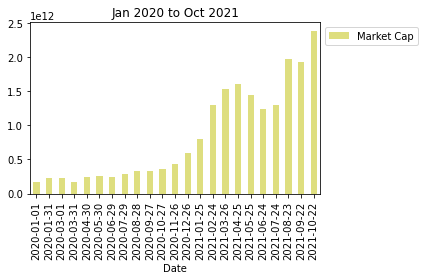

In [111]:
# Set the index to be "State" so they will be used as labels
market_graph = df.set_index("Date")

# Use DataFrame.plot() in order to create a bar chart of the data
# market_graph.plot(kind="bar", color='y', alpha=0.5, figsize=(20,3))
market_graph.plot(kind="bar", color='y', alpha=0.5)

# Set a title for the chart
plt.title("Jan 2020 to Oct 2021")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images_sven/Pandemic_Market_Bar_Chart.png")

In [113]:
merge_df

,Date,Market Cap,USD,EUR,JPY,GBP,AUD,CHF,SEK,PLN,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,2020-01-01,171054846794,1.12,1,121.96,0.85,1.60,1.09,10.48,4.26,...,15585.12,10720.63,10937.84,10768.48,10018.58,7276.50,4594.88,24187.53,21987.86,3681.30
1,2020-01-02,166309900584,1.12,1,121.25,0.85,1.60,1.09,10.46,4.24,...,15515.52,10625.74,10897.19,10517.38,9925.32,7207.01,4546.55,24085.29,21894.92,3635.56
2,2020-01-03,175099815779,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,...,15557.24,10604.79,10881.00,10515.51,9915.66,7231.21,4542.12,24061.84,21873.60,3636.65
3,2020-01-04,176022122183,1.12,1,120.62,0.85,1.61,1.09,10.49,4.24,...,15556.55,10604.32,10880.51,10515.04,9915.22,7230.89,4541.92,24060.76,21872.62,3636.49
4,2020-01-05,176507998857,1.12,1,120.51,0.85,1.61,1.08,10.51,4.24,...,15557.91,10606.30,10882.55,10517.01,9917.07,7232.24,4542.77,24065.26,21876.71,3637.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2021-10-27,2311272399353,1.16,1,131.98,0.84,1.55,1.07,9.96,4.62,...,16494.14,12405.97,12504.57,11069.09,11895.58,8028.21,4721.11,24009.21,22735.58,4361.52
666,2021-10-28,2420299099856,1.17,1,132.73,0.85,1.55,1.07,9.94,4.62,...,16638.75,12491.18,12590.50,11258.42,11988.73,8078.69,4749.92,24185.43,22902.45,4416.32
667,2021-10-29,2461899600103,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95
668,2021-10-30,2453810755354,1.16,1,131.73,0.84,1.54,1.06,9.94,4.61,...,16449.67,12358.74,12457.01,11139.05,11861.61,7994.24,4699.56,23928.99,22659.61,4346.95


In [119]:
len(list(merge_df))

23

In [126]:
market_value_list = []
usd_value_list = []
EUR_value_list = []
JPY_value_list = []
GBP_value_list = []
AUD_value_list = []
CHF_value_list = []
SEK_value_list = []
PLN_value_list = []
MXN_value_list = []
IRR_value_list = []
VND_value_list = []
IDR_value_list = []
UZS_value_list = []
SLL_value_list = []
GNF_value_list = []
LAK_value_list = []
PYG_value_list = []
KHR_value_list = []
STD_value_list = []
BYR_value_list = []
COP_value_list = []



for date in date_list:
    for i in range(len(merge_df)):
        search = merge_df.iloc[i,0]
        if search == date:
            market_value = float(merge_df.iloc[i,1])
            market_value_list.append(market_value)
            
            usd_value = float(merge_df.iloc[i,2])
            usd_value_list.append(usd_value)
            
            EUR_value = float(merge_df.iloc[i,3])
            EUR_value_list.append(EUR_value)
            
            JPY_value = float(merge_df.iloc[i,4])
            JPY_value_list.append(JPY_value)
            
            GBP_value = float(merge_df.iloc[i,5])
            GBP_value_list.append(GBP_value)
          
            AUD_value = float(merge_df.iloc[i,6])
            AUD_value_list.append(AUD_value)
            
            CHF_value = float(merge_df.iloc[i,7])
            CHF_value_list.append(CHF_value)
            
            SEK_value = float(merge_df.iloc[i,8])
            SEK_value_list.append(SEK_value)
            
            PLN_value = float(merge_df.iloc[i,9])
            PLN_value_list.append(PLN_value)
            
            MXN_value = float(merge_df.iloc[i,10])
            MXN_value_list.append(MXN_value)
            
            IRR_value = float(merge_df.iloc[i,11])
            IRR_value_list.append(IRR_value)
            
            VND_value = float(merge_df.iloc[i,12])
            VND_value_list.append(VND_value)
            
            IDR_value = float(merge_df.iloc[i,13])
            IDR_value_list.append(IDR_value)
            
            UZS_value = float(merge_df.iloc[i,14])
            UZS_value_list.append(UZS_value)
            
            SLL_value = float(merge_df.iloc[i,15])
            SLL_value_list.append(SLL_value)
            
            GNF_value = float(merge_df.iloc[i,16])
            GNF_value_list.append(GNF_value)
            
            LAK_value = float(merge_df.iloc[i,17])
            LAK_value_list.append(LAK_value)
            
            PYG_value = float(merge_df.iloc[i,18])
            PYG_value_list.append(PYG_value)

            KHR_value = float(merge_df.iloc[i,19])
            KHR_value_list.append(KHR_value)
            
            STD_value = float(merge_df.iloc[i,20])
            STD_value_list.append(STD_value)
            
            BYR_value = float(merge_df.iloc[i,21])
            BYR_value_list.append(BYR_value)

            COP_value = float(merge_df.iloc[i,22])
            COP_value_list.append(COP_value)



In [127]:

data={'Date':date_list, 'Market Cap':market_value_list, 
      'USD': usd_value_list,
     'EUR': EUR_value_list,
     'GBP': GBP_value_list,
     'AUD': AUD_value_list,
     'CHF': CHF_value_list,
      'SEK': SEK_value_list,
      'PLN': PLN_value_list,
      'MXN': MXN_value_list,
      'IRR': IRR_value_list,
      'VND': VND_value_list,
      'IDR': IDR_value_list,
      'UZS': UZS_value_list,
      'SLL': SLL_value_list,
      'GNF': GNF_value_list,
      'LAK': LAK_value_list,
      'PYG':PYG_value_list,
      'KHR':KHR_value_list,
      'STD':STD_value_list,
      'BYR':BYR_value_list,
      'COP':COP_value_list
     }

df = pd.DataFrame(data)

df 

,Date,Market Cap,USD,EUR,GBP,AUD,CHF,SEK,PLN,MXN,...,IDR,UZS,SLL,GNF,LAK,PYG,KHR,STD,BYR,COP
0,2020-01-01,1.710548e+11,1.12,1.0,0.85,1.60,1.09,10.48,4.26,21.22,...,15585.12,10720.63,10937.84,10768.48,10018.58,7276.50,4594.88,24187.53,21987.86,3681.30
1,2020-01-31,2.328463e+11,1.11,1.0,0.84,1.66,1.07,10.69,4.30,20.91,...,15280.39,10590.27,10762.25,10443.27,9858.00,7249.41,4504.61,23921.91,21746.40,3794.60
2,2020-03-01,2.210195e+11,1.11,1.0,0.86,1.70,1.07,10.63,4.33,21.91,...,15445.26,10527.07,10735.93,10426.51,9848.55,7208.57,4503.23,24189.03,21659.73,3868.15
3,2020-03-31,1.681114e+11,1.10,1.0,0.89,1.80,1.06,10.92,4.56,26.20,...,17951.64,10529.97,10722.93,10386.63,9857.38,7268.88,4476.62,24315.71,21611.25,4475.51
4,2020-04-30,2.446182e+11,1.09,1.0,0.87,1.69,1.06,10.69,4.54,26.52,...,16713.01,11081.81,10616.64,10343.02,9834.08,7147.10,4500.58,24135.23,21452.19,4328.20
5,2020-05-30,2.634888e+11,1.11,1.0,0.90,1.67,1.07,10.49,4.45,24.62,...,16273.76,11254.92,10827.37,10510.88,10011.16,7379.17,4575.26,24487.29,21765.80,4138.83
6,2020-06-29,2.463500e+11,1.12,1.0,0.91,1.64,1.07,10.49,4.46,25.93,...,16283.15,11447.02,10960.03,10817.20,10161.51,7625.26,4603.33,24799.64,22043.78,4212.50
7,2020-07-29,2.903832e+11,1.18,1.0,0.91,1.64,1.08,10.29,4.41,25.91,...,17094.89,12035.84,11487.96,11323.00,10682.03,8194.71,4824.94,25798.02,23093.74,4366.48
8,2020-08-28,3.264448e+11,1.19,1.0,0.89,1.62,1.08,10.28,4.39,25.90,...,17303.63,12229.44,11622.31,11499.86,10883.70,8300.84,4916.40,25349.14,23333.90,4459.04
9,2020-09-27,3.253118e+11,1.16,1.0,0.91,1.65,1.08,10.62,4.56,25.96,...,17301.16,11983.99,11384.79,11326.62,10739.05,8138.73,4759.86,24472.72,22804.49,4522.50


In [158]:
max_usd = df['USD'].max()
min_usd = df['USD'].min()

min_market_cap = df['Market Cap'].min()
400000000000 - min_market_cap
#-1986780129398.0
line_spot = 100000000000.0 + min_market_cap
line_spot

268111413591.0

The r-squared is: 0.4737418865820348



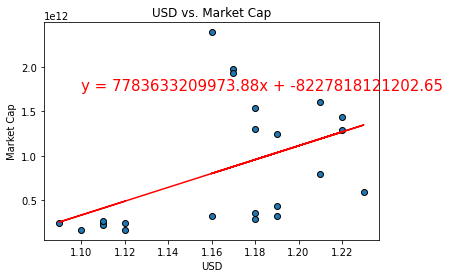

In [169]:

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = df['USD']
y_values = df['Market Cap']
x_label = 'USD'
y_label = 'Market Cap'
blank_hemisphere = 'USD vs Market Cap'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{x_label} vs. {y_label}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
# (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(1.10, line_spot+1468111413591.0),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")
# Save the figure
plt.savefig("Images_sven/USD_vs_CyrptoMarket_Pandemic.png")

# Show Graph
plt.show()